***BASIC VISUALIZATION TOOLS***

**AREA PLOT**

• Also known as area chart or area graph.

• Commonly used to represent cumulated totals using numbers or
percentages over time.

• Is based on the line plot.

***Generating Area plot***

***Downloading and prepping Data***

In [ ]:
!mamba install openpyxl==3.0.9 -y

/bin/bash: mamba: command not found


In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [ ]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [ ]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


***Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).***

In [ ]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


***Rename some of the columns so that they make sense***

In [ ]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


*** for consistency, ensure that all column labels of type string***

In [ ]:
all(isinstance(column, str) for column in df_can.columns)

False

In [ ]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

*** set the country name as index - useful for quickly looking up countries using .loc method. ***


In [ ]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


***add total column***

In [ ]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [ ]:
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

***Visalizing Data using Matplotlib***

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  

print('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.2.2


***Area Plots***

In [ ]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


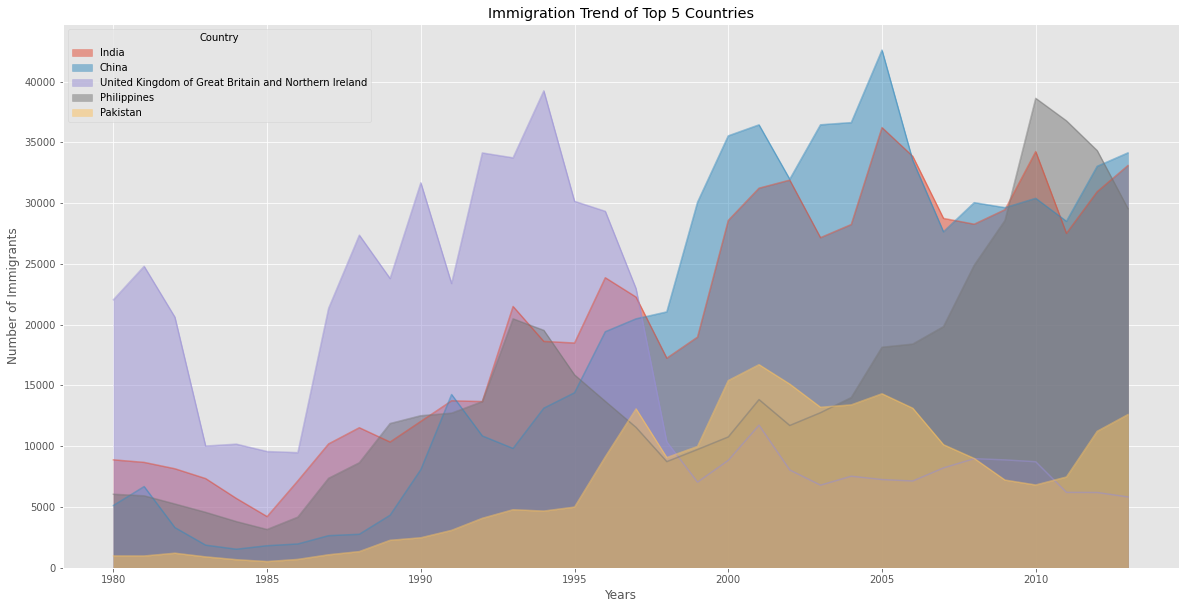

In [ ]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

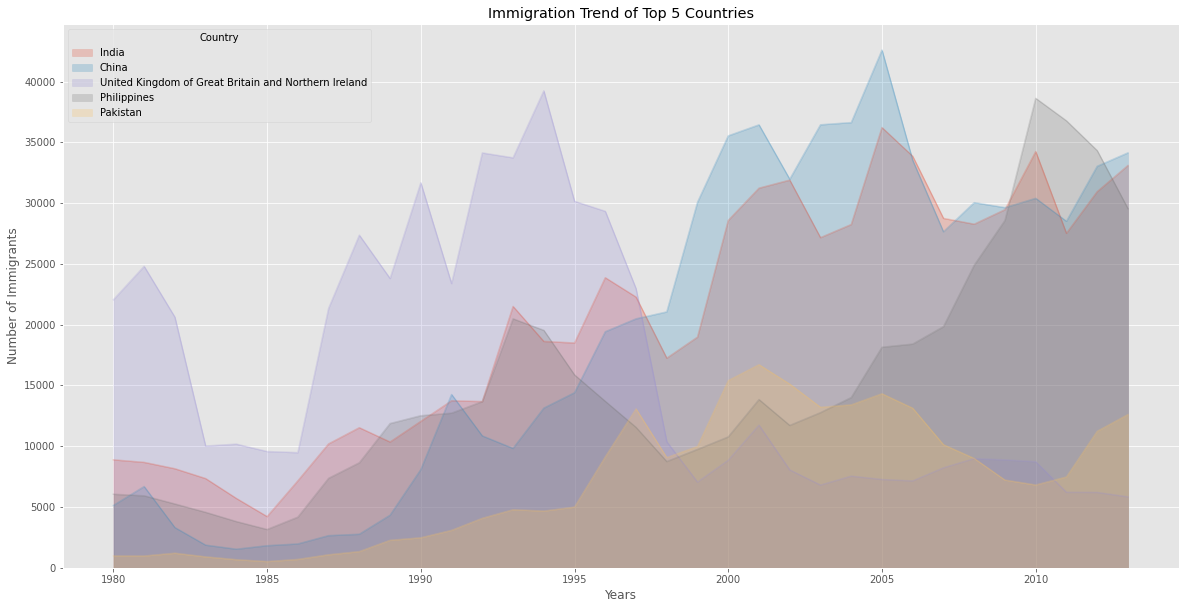

In [ ]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             alpha=0.25,
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

***HISTOGRAMS***

A histogram is a way of representing the frequency distribution of a
variable.



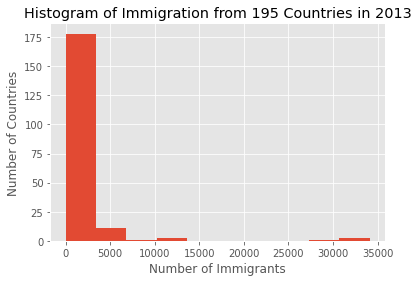

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_can['2013'].plot(kind='hist')

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

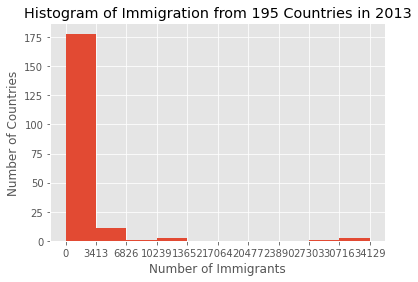

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

count, bin_edges=np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', xticks=bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

***LINE PLOTS***

A line plot is a type of plot which displays information as a series of
data points called 'markers' connected by straight line segments.


***Creating Line Plots***

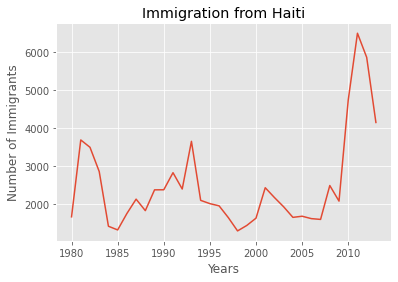

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

years=list(map(str, range(1980,2014)))

df_can.loc['Haiti',years].plot(kind='line')

plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()




***BAR CHARTS***

Unlike a histogram, a bar chart is commonly used to compare the
values of a variable at a given point in time.

***Creating Bar Charts*** 

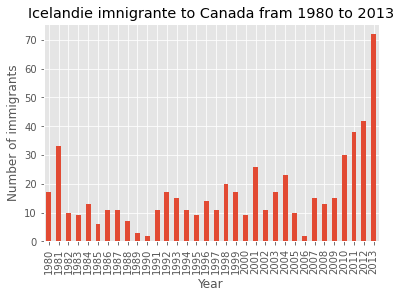

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt


df_can.loc['Iceland', years].plot(kind='bar')

plt.title( 'Icelandie imnigrante to Canada fram 1980 to 2013')
plt.xlabel ('Year')
plt.ylabel('Number of immigrants')
plt.show()

 ***SPECIALIZED VISUALIZATION TOOLS***

***PIE CHART***

A pie chart is a circular statistical graphic divided into slices to illustrate numerical
proportion. 

***Creating a Pie Charts***

In [ ]:
df_continents=df_can.groupby( 'Continent', axis=0).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


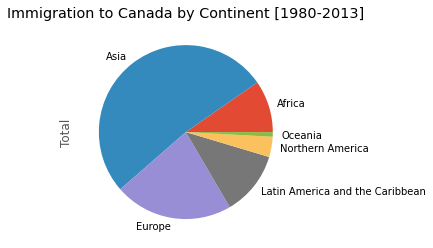

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_continents['Total'].plot(kind='pie')

plt.title('Immigration to Canada by Continent [1980-2013]')

plt.show()

***BOX PLOTS***

A box plot is a way of statistically|
representing the distribution of given
data through five main dimensions.

(a) [MINIMUM] The first dimension is minimum, which is the Minimum smallest number in the sorted data.

(b) [FIRST QUARTILE] The second dimension is first quartile, which is the point 25% of the way through the sorted data. In other words, a quarter of the datapoints are less than this value. 

(c) [MEDIAN] The third dimension is median,which is the median of the sorted data.

(d) [THIRD QUARTILE] The fourth dimension is third
quartile,which is the point 75%
of the way through the
sorted data. In other
words,three-quarters of the
data points are less than
this value. 

(e) [MAXIMUM] And the final dimension is maximum which is the highest number in the sorted data. 

(f) [OUTLIERS]

***Creating a Box Plots***

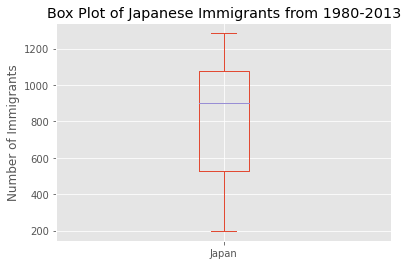

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_can.loc[['Japan'], years].transpose().plot(kind='box')

plt.title('Box Plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

***SCATTER PLOTS***

A scatter plot is a type of plot that displays values pertaining to typically two variables against each other.
Usually it is a dependent variable
to be plotted against an independent variable in order to determine if
any correlation between the
two variables exists. 

***Creating a Scatter Plots***

In [ ]:
df_total= pd.DataFrame(df_can[years].sum(axis=0))

df_total.index = map(int, df_tot.index)

df_total.reset_index(inplace = True)

df_total.columns = ['year', 'total']

df_total.head()

,year,total
0,0,99137
1,1,110563
2,2,104271
3,3,75550
4,4,73417


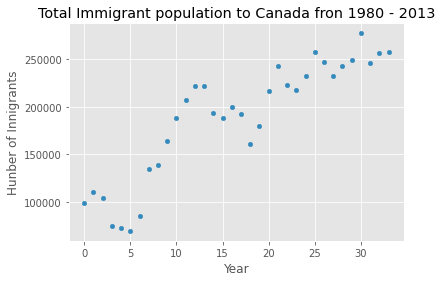

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df_total.plot(
   kind='scatter',
  x= 'year',
  y='total',
)

plt.title( 'Total Immigrant population to Canada fron 1980 - 2013')
plt.xlabel ('Year')
plt.ylabel( 'Hunber of Innigrants')
plt.show()

***ADVANCED VISUALIZATION TOOLS***

***WAFFLE CHARTS***

(a)A Waffle Charts is a way to visualize data in relation to a whole or to highlight progress against a given threshold.

(b) A waffle chart is an interesting visualization that is normally created
to display progress toward goals.

(c) Unfortunately Matplotlib
does not have a built-in function to create waffle charts.



***WORD CLOUDS***

(a) A word cloud is simply a depiction of the importance of different words in the body of text.

(b) A Word cloud is a depiction of the frequency of different words in
some textual data.

(c) A word cloud works in a word simple way; more specific word appears in a source of textual data the bigger and bolder it appears in the world cloud.   

(d) Matplotlib does not have a built-in function to generate word clouds.

(e) However, luckily a Python library for cloud word generation that was created by Andreas Mueller.





***SEABORN AND REGRESSION PLOTS***

(a) Seaborn is a Python visualization library based on Matplotlib.


(b) It was built primarily to provide a
high-level interface for drawing attractive statistical graphics, such as
regression plots, box plots, and so on.

(c) Visuals that need ~20 lines of code using Matplotlib to be created,
with seaborn, the number of lines of code is reduced by 5-fold.

(d) Seaborn makes creating plots very
efficient. Therefore with Seaborn you
can generate plots with code that is 5
times less than with Matplotlib. 


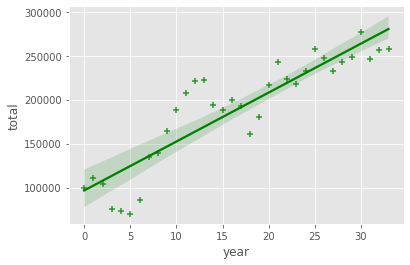

In [77]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_total,
                color='green', marker='+') 

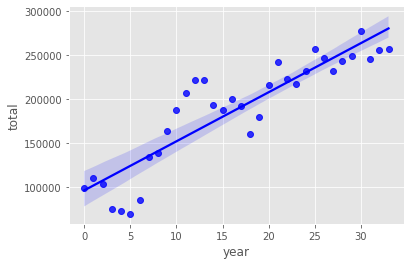

In [78]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_total,
                color='blue') 

***CREATING MAPS AND VISUALIZING GEOSPATIAL DATA***

 **INTRODUCTION TO FOLIUM**

***What is Folium?***

• Folium is a powerful Python library that helps you create several types of
Leaflet maps.

• It enables both the binding of data to a map for choropleth visualizations
as well as passing visualizations as markers on the map.

• The library has a number of built-in tilesets from OpenStreetMap, Mapbox,
and Stamen, and supports custom tilesets with Mapbox API keys.

**Creating a World Map**

In [81]:
!mamba install openpyxl==3.0.9 -y

/bin/bash: mamba: command not found


In [82]:
import numpy as np
import pandas as pd

In [85]:
import folium

# define the world map
world_map=folium.Map()

# display world map
world_map

The default map style is the open street map , which shows a street view of an view area when you're zoomed in and shows the bordrs of the world countries when you're zoomed all the way out.


**Creating a Map of Cannada**

In [87]:
# define the world map centered around
# Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.351],zoom_start=4)
# display world map
world_map


**Map Styles - Stamen Toner**


In [91]:
#create a Stamen Toner map of
# the world centered around Canada
world_map = folium.Map(
  location=[56.130, -106.35],
  zoom_start=4,tiles='Stamen Toner')
# display map
world_map

**Map Styles - Stamen Terrain**


In [92]:
#create a Stamen Toner map of
# the world centered around Canada
world_map = folium.Map(
  location=[56.130, -106.35],
  zoom_start=4,tiles='Stamen Terrain')
# display map
world_map

***MAPS WITH MARKERS***

**Add a Marker**



In [157]:
canada_map = folium.Map(
  location=[56.130, -106.35],
  zoom_start=4) 

In [158]:
ontario=folium.map.FeatureGroup()

In [159]:
ontario.add_child(folium.Marker(location=[51.25,-85.321],icon=folium.Icon(color="red")))
map.add_child(ontario) 

**Label the Marker**

In [160]:
folium.Marker([51.25,-85.32],
              popup="ontario").add_to(canada_map)

canada_map            

**Choropleth Maps**

(a) A choropleth map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per capita income.

(b) The higher the measurement the darker the color.




**Geojson File**

(a) In order to create a choropleth map of a region of interest,Folium requires a GeoJSON file that includes geospatial data of the region.

(b) For a choropleth map of the world, we would need a GeoJSON file that lists each country along with any geospatial data to define its borders and
boundaries. 


In [229]:
world_map=folium.Map(
    zoom_start=2,
    tiles="openstreetmap"
)

world_map